# Abalone - UCI

In [1]:
%pylab inline
pylab.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
data_df = pd.read_csv(url, header=None)

In [3]:
data_df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Attribute information

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

In [4]:
data_df.columns = ['Sex', 'Length', 'Diameter', 'Height', 
                   'Whole_Weight', 'Shucked_Weight', 'Viscera_Weight', 'Shell_Weight',
                  'Rings'] 

# Variations of Rings for Different Sexes

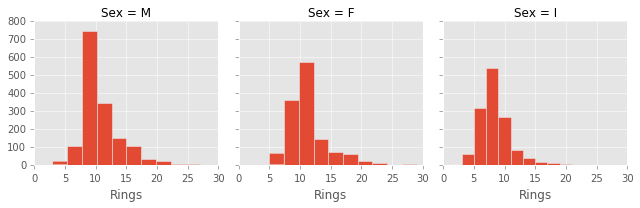

In [5]:
g = sns.FacetGrid(col='Sex', data=data_df)
g = g.map(pylab.hist, 'Rings')

# Bivariate Analysis of Numerical Features with Rings

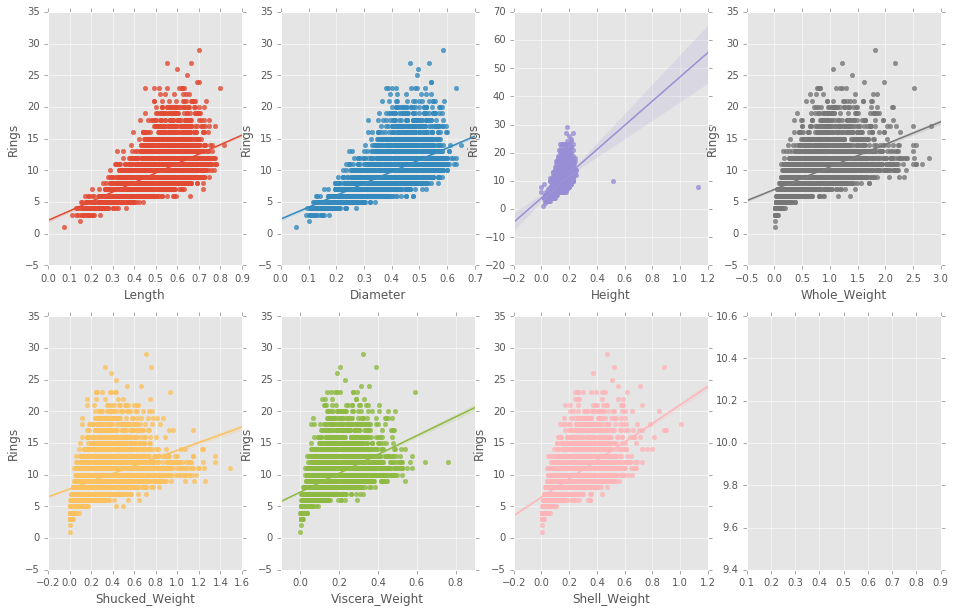

In [6]:
features = data_df.columns.drop(['Sex', 'Rings'])

_, axes = pylab.subplots(2, 4, figsize=(16, 10))

for i, fname in enumerate(features):
    row, col = divmod(i, 4)
    sns.regplot(data=data_df, x=fname, y='Rings', ax=axes[row][col])

# Feature Correlations with Rings

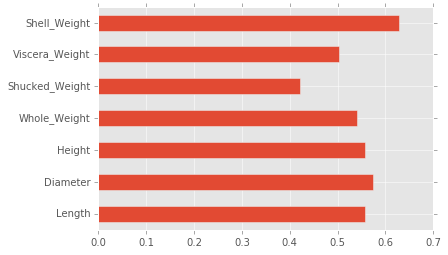

In [7]:
f_corrs = data_df.loc[:, features].corrwith(data_df.loc[:, 'Rings'])
f_corrs.plot(kind='barh')

# Feature Correlations

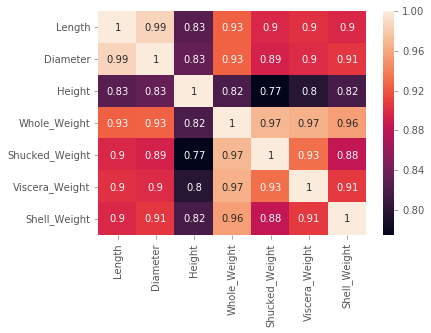

In [8]:
f_corrs = data_df.loc[:, features].corr()
sns.heatmap(f_corrs, annot=True)

# OLS Regression with the Feature with Highest Correlation

In [9]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Rings ~ Shell_Weight', data=data_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2713.
Date:                Tue, 15 Aug 2017   Prob (F-statistic):               0.00
Time:                        00:38:14   Log-Likelihood:                -9770.8
No. Observations:                4177   AIC:                         1.955e+04
Df Residuals:                    4175   BIC:                         1.956e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.4621      0.077     83.764      0.000       6.311       6.613
Shell_Weight    14.5357      0.279     52.084      0.000      13.989      15.083
==============================================================================
Omnibus:                     1213.646   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3601.423
Skew:                           1.503   Prob(JB):                         0.00
Kurtosis:                       6.414   Cond. No.                         7.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS Regression with All Numerical Features

In [10]:
all_features = ' + '.join(features)
formula = ' ~ '.join(['Rings', all_features])
print(formula)
model = sm.ols(formula=formula, data=data_df)
result = model.fit()
result.summary()

Rings ~ Length + Diameter + Height + Whole_Weight + Shucked_Weight + Viscera_Weight + Shell_Weight


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Tue, 15 Aug 2017   Prob (F-statistic):               0.00
Time:                        00:38:14   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.9852      0.269     11.092      0.000       2.458       3.513
Length            -1.5719      1.825     -0.861      0.389      -5.149       2.006
Diameter          13.3609      2.237      5.972      0.000       8.975      17.747
Height            11.8261      1.548      7.639      0.000       8.791      14.861
Whole_Weight       9.2474      0.733     12.622      0.000       7.811      10.684
Shucked_Weight   -20.2139      0.823    -24.552      0.000     -21.828     -18.600
Viscera_Weight    -9.8297      1.304     -7.538      0.000     -12.386      -7.273
Shell_Weight       8.5762      1.137      7.545      0.000       6.348      10.805
==============================================================================
Omnibus:                      933.799   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2602.745
Skew:                           1.174   Prob(JB):                         0.00
Kurtosis:                       6.072   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using a Decision Tree

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

sorted_labels = sorted(pd.unique(data_df.Sex))
encoder = MultiLabelBinarizer(classes=sorted_labels)
encoded = encoder.fit_transform(data_df.Sex)
encoded_sex = pd.DataFrame(index=data_df.index, data=encoded, columns=['sex_{}'.format(l) for l in sorted_labels])
encoded_df = data_df.drop('Sex', axis=1).merge(encoded_sex, left_index=True, right_index=True)

In [19]:
encoded_df.head()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

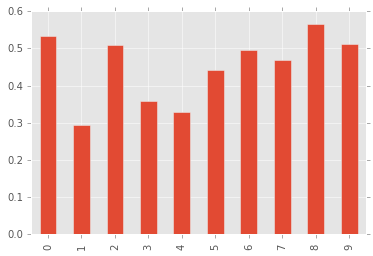

In [30]:
features = encoded_df.drop('Rings', axis=1)
target = encoded_df.Rings

model = SVR(C=1000, gamma=0.001, kernel='rbf')
prep = StandardScaler()
estimator = make_pipeline(prep, model)
scores = cross_val_score(estimator=estimator, X=features, y=target, scoring='r2', cv=10)

scores = pd.Series(scores)
scores.plot(kind='bar')